## HOUSING: PRICE PREDICTION

## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price.The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


## Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables.

## Importing Data Set

In [1]:
import numpy as np

In [2]:
import pandas as pd
Train_data=pd.read_csv("E:\\DATA SCIENCE COURSE\\INTERSHIP- FLIPROBO\\Housing Project\\train.csv")
Train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
Train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There is lot of missing data in columns "Alley","PoolQC","Fence","MiscFeature", Also ID is unique value to identify the property, so not much influence would be made on the prediction.
So dropping all the columns.

In [5]:
Train_d= Train_data.drop(["Alley","PoolQC","Fence","MiscFeature","Id"], axis=1)

In [6]:
Train_d.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000
5,60,RL,58.0,14054,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,New,Partial,219210
6,20,RL,NaN,11341,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,95,0,0,5,2010,WD,Normal,121500
7,20,RL,88.0,13125,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,155000
8,20,RL,70.0,9170,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,184,0,0,0,400,4,2007,WD,Normal,140000
9,50,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,10,2008,COD,Abnorml,118500


In [7]:
Train_d.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [8]:
for i in Train_d.columns:
    print (i)
    '/n'
    print(Train_d[i].unique())

MSSubClass
[120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
LotFrontage
[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]
LotArea
[  4928  15865   9920  11751  16635  14054  11341  13125   9170   8480
   8600   9548   9196   8892  16466  10592   5890   7314   7917   2016
  12435   8445   9717  10659   9230  21000  25339  11394   6380  11988
   7658   3378  18890  12358  14762  10356  10400  12615   7540   9100
  31770  13300   3180   2522   8385   

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property, it has 'nan' values and needs to be treated.

Utilities: Type of utilities available, it has only one type of data set (AllPub	All public Utilities (E,G,W,& S)) can be removed.

BsmtQual: Evaluates the height of the basement,'nan' values needs to be treated

BsmtCond: Evaluates the general condition of the basement,'nan' value needs to be treated

MasVnrType: Masonry veneer type, nan values

MasVnrArea: Masonry veneer area in square feet, 0 value

ExterQual: Evaluates the quality of the material on the exterior ,nan

ExterCond: Evaluates the present condition of the material on the exterior,nan

BsmtExposure: Refers to walkout or garden level walls, nan

BsmtFinType1: Rating of basement finished area, nan

BsmtFinType2: Rating of basement finished area (if multiple types),nan

FireplaceQu: Fireplace quality, nan values, 617 non-null, it can be dropped and we have similar column (Fireplaces: Number of fireplaces)

GarageType, GarageYrBlt, GarageFinish nan values








In [9]:
Train_1= Train_d.drop(['Utilities','FireplaceQu' ], axis=1)

In [10]:
Train_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,...,0,0,0,0,0,6,2009,WD,Normal,215000


## Replacing NAN

In [11]:
Train_1['LotFrontage'].fillna(int(Train_1['LotFrontage'].mean()), inplace=True)

In [12]:
Train_1['MasVnrArea'].fillna(int(Train_1['MasVnrArea'].mean()), inplace=True)

In [13]:
Train_1['GarageYrBlt'].fillna(int(Train_1['GarageYrBlt'].mean()), inplace=True)

In [14]:
Train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

In [15]:
Train_num = Train_1.select_dtypes (exclude='object')

In [16]:
Train_num.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
892,20,64.0,7406,7,5,2006,2006,84.0,684,0,...,105,54,0,0,0,0,0,7,2006,194000
253,60,70.0,9453,7,7,1993,2003,0.0,402,0,...,370,70,0,238,0,0,0,2,2010,194500
511,45,57.0,7449,7,7,1930,1950,0.0,0,0,...,0,0,205,0,0,0,0,6,2007,139400
351,45,60.0,9600,5,7,1949,2003,0.0,220,0,...,0,0,0,0,0,0,0,5,2007,135000
1083,120,48.0,6955,7,5,2005,2006,94.0,0,0,...,132,35,0,0,0,0,0,9,2006,202500


## Visualization

In [17]:
Train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.0,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,70.0,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,70.0,9819,5,5,1967,1967,31.0,450,0,...,0,0,0,0,0,0,0,2,2010,122000
1164,20,67.0,8777,4,5,1949,2003,0.0,0,0,...,0,96,0,0,0,0,0,5,2009,108000
1165,160,24.0,2280,6,6,1976,1976,0.0,566,0,...,87,0,0,0,0,0,0,7,2009,148500
1166,70,50.0,8500,4,4,1920,1950,0.0,0,0,...,0,54,172,0,0,0,0,7,2008,40000


# Temporal variable

In [18]:
import numpy as np
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
year_feature=[feature for feature in Train_num if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House price vs year sold')

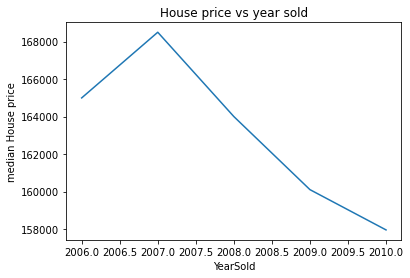

In [20]:
Train_num.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YearSold')
plt.ylabel('median House price')
plt.title("House price vs year sold")

It can be seen that the price increase initially but after 2 years it keep on decresing, which is justified.

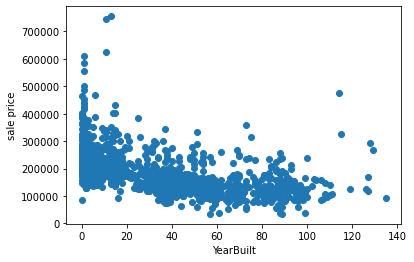

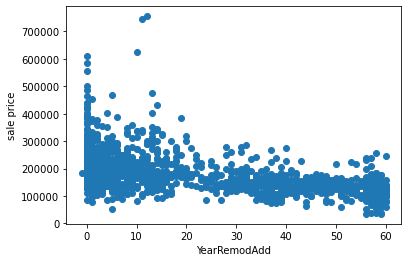

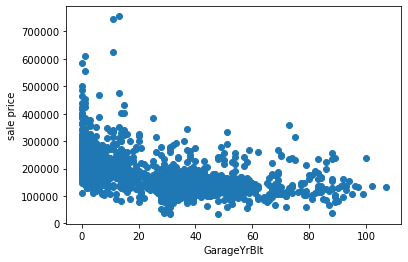

In [21]:
for feature in year_feature:
    if feature!='YrSold':
        data=Train_num.copy()
        data[feature]= data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('sale price')
        plt.show()

Here again we can visualize that as the house is getting old, the sale price decreases.

In [22]:
discrete_feature=[feature for feature in Train_num if len(Train_num[feature].unique())<25 and feature not in year_feature]
len(discrete_feature)

17

In [23]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

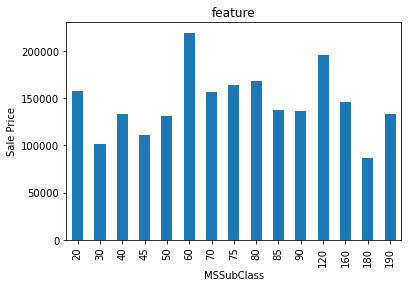

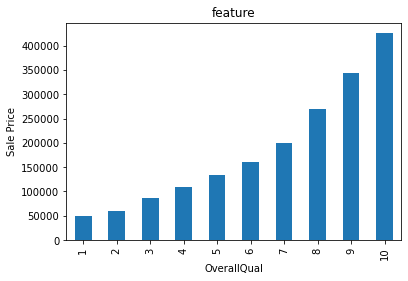

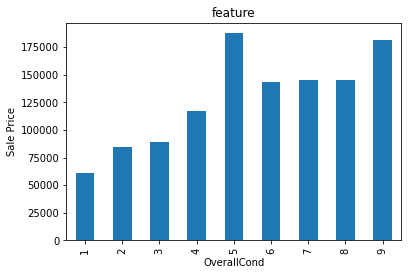

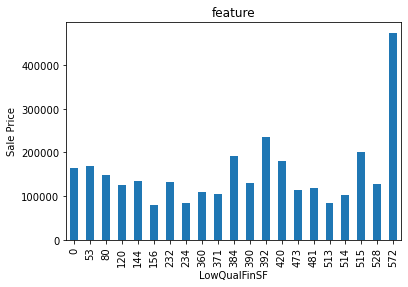

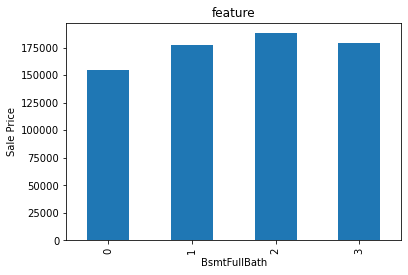

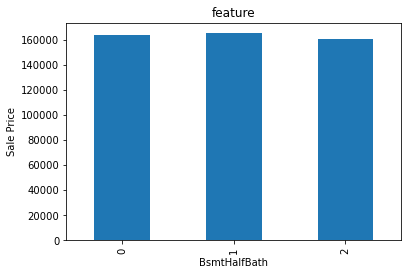

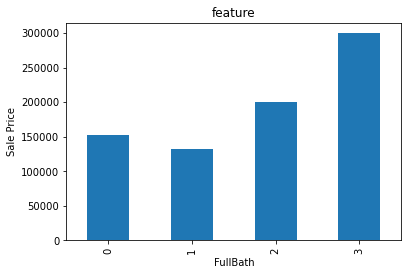

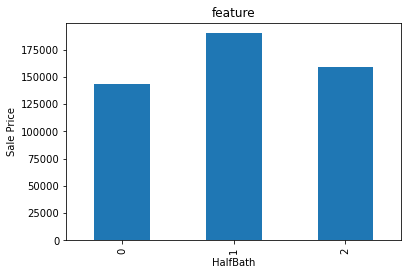

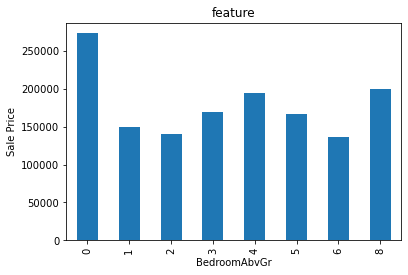

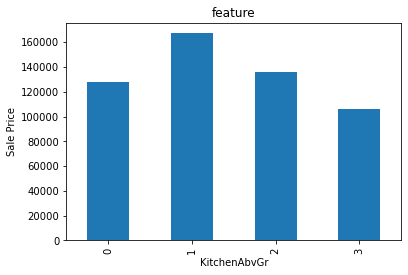

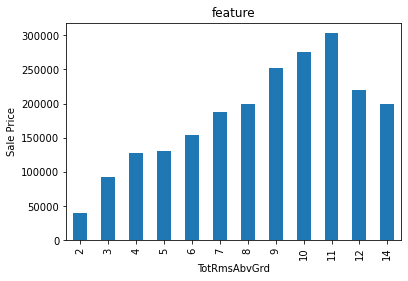

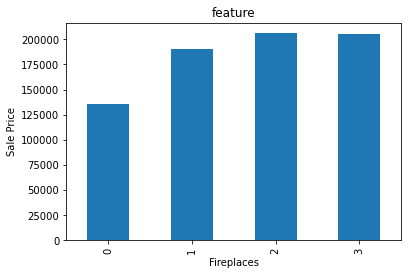

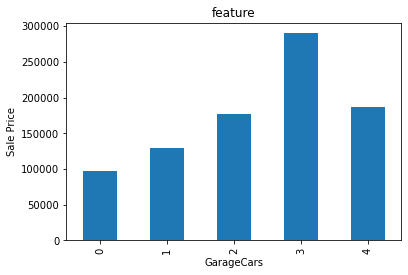

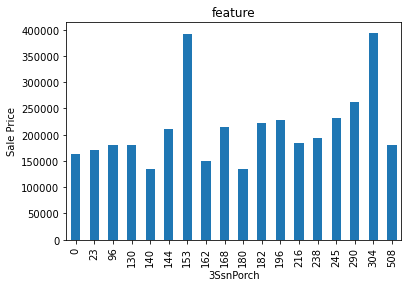

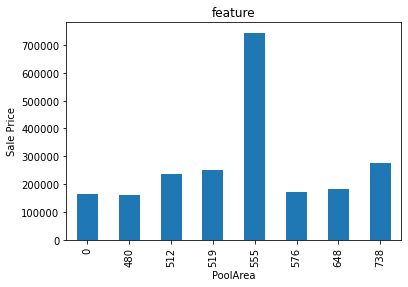

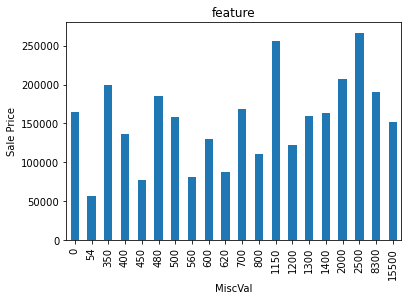

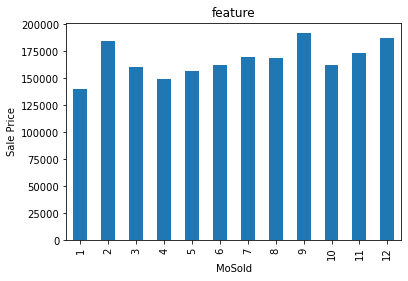

In [24]:
for feature in discrete_feature:
    data=Train_num.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title('feature')
    plt.show()

In [25]:
continuous_feature=[feature for feature in Train_num if feature not in discrete_feature + year_feature]
len(continuous_feature)

16

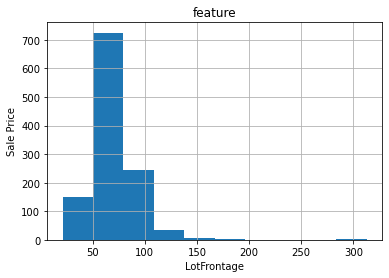

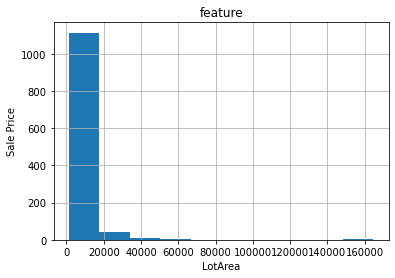

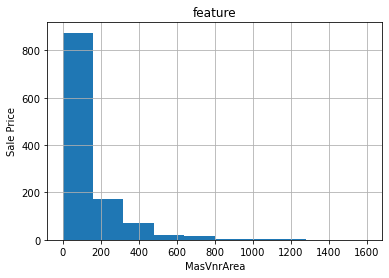

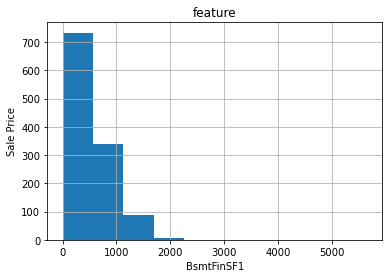

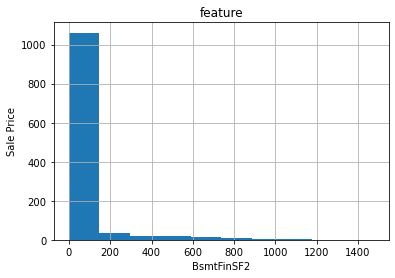

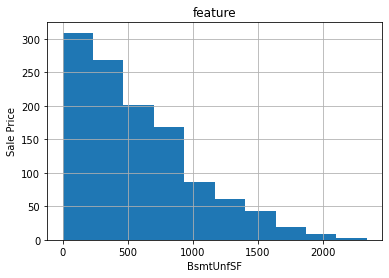

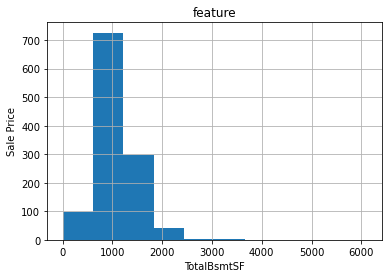

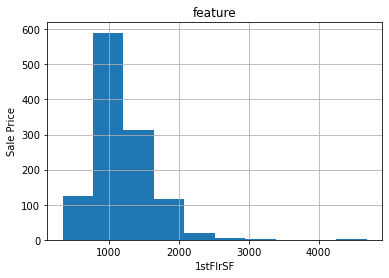

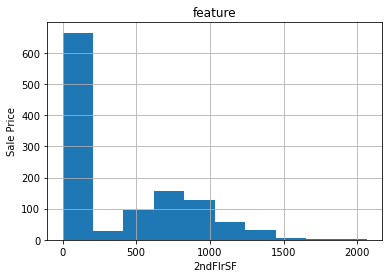

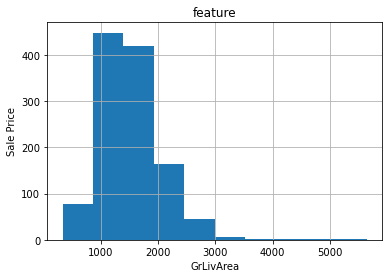

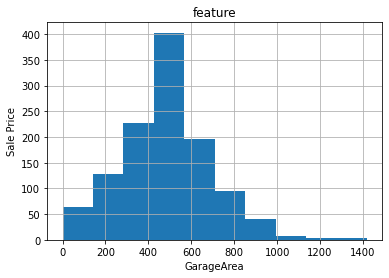

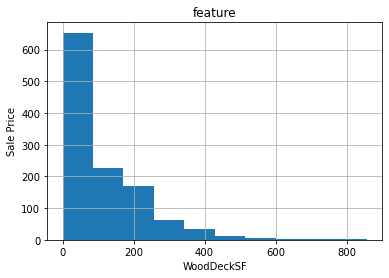

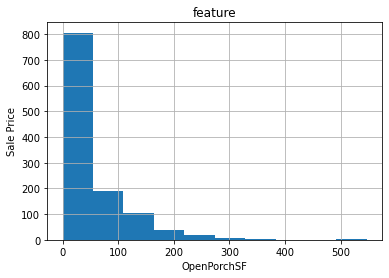

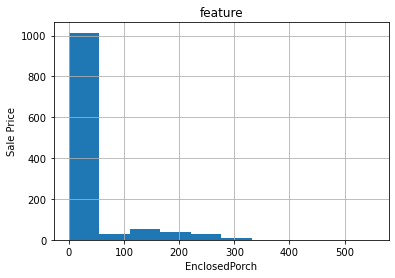

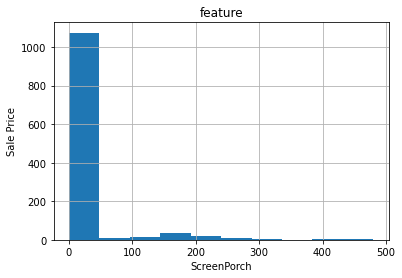

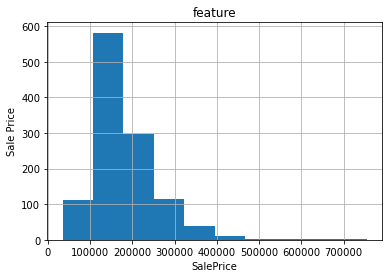

In [26]:
for feature in continuous_feature:
    data=Train_num.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title('feature')
    plt.show()

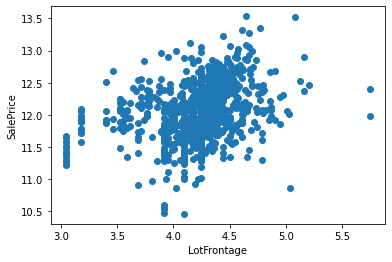

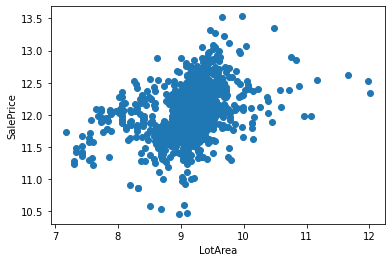

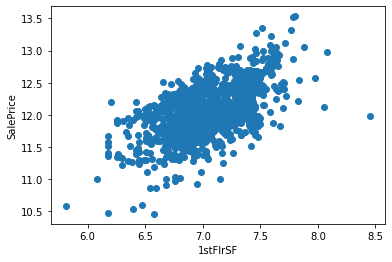

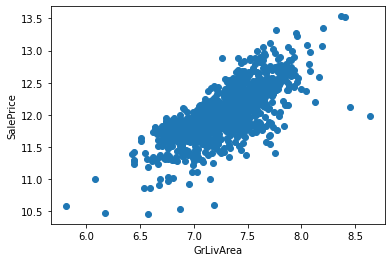

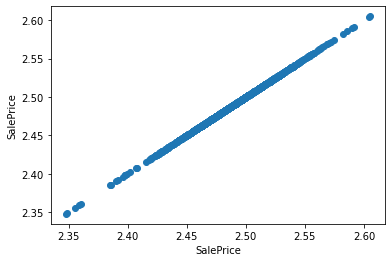

In [27]:
## we will using logarithmic feature
for feature in continuous_feature:
    data=Train_1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

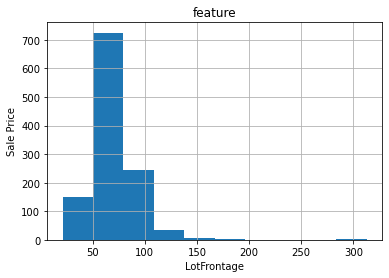

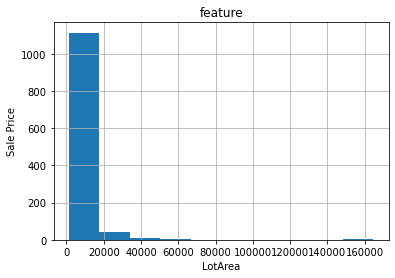

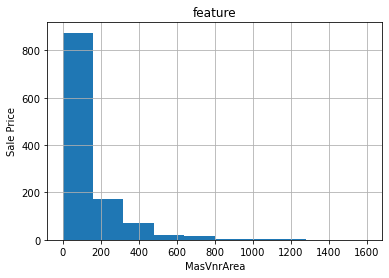

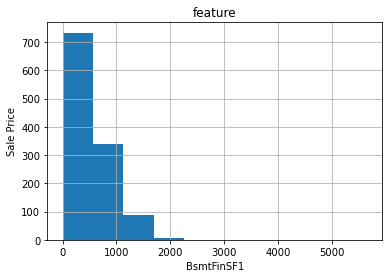

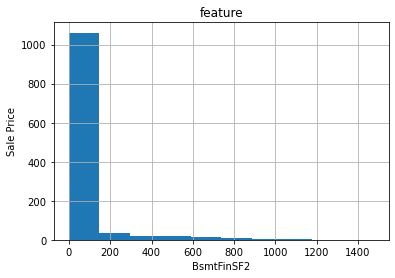

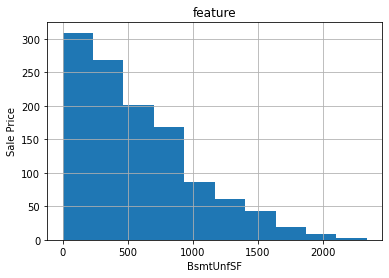

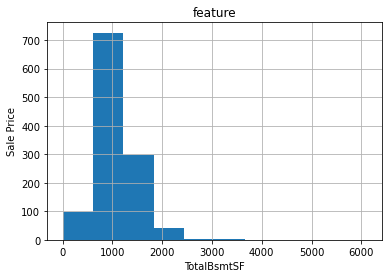

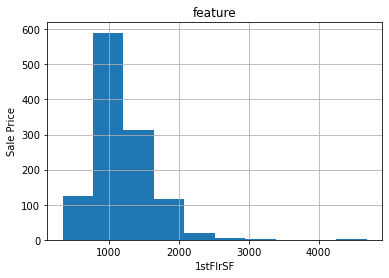

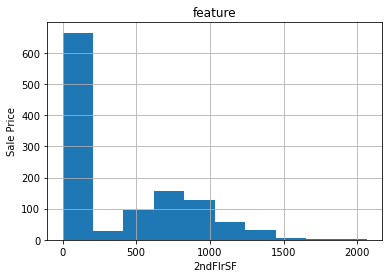

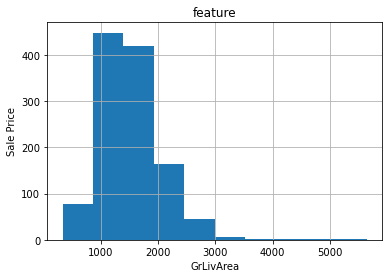

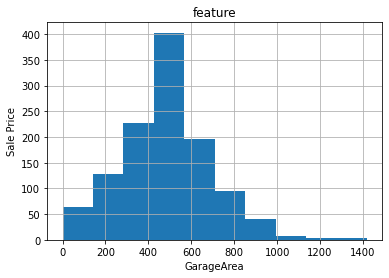

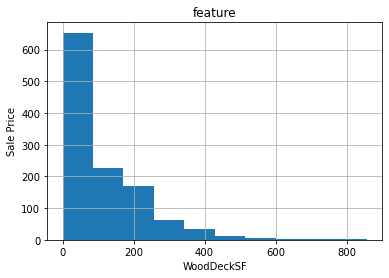

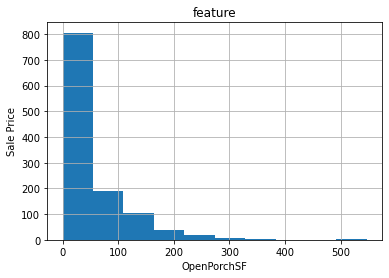

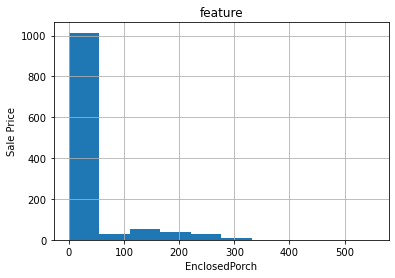

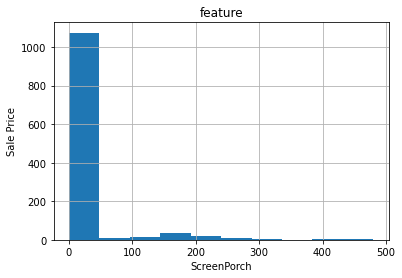

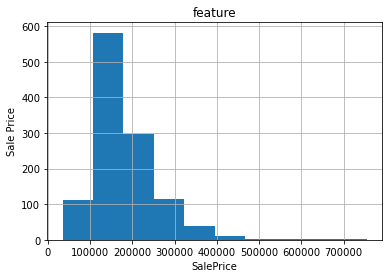

In [28]:
for feature in continuous_feature:
    data=Train_num.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title('feature')
    plt.show()

converting the Temporal data in number, by finding the toatl number of years the flat was from the yr sold(yr sold- other feature)

In [29]:
for feature in['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    Train_1[feature]=Train_1['YrSold']-Train_1[feature]

In [30]:
Train_1[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,31,31,30.0
1,37,37,37.0
2,11,10,10.0
3,33,33,33.0
4,32,9,32.0


In [31]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    Train_1[feature]=np.log(Train_1[feature])

In [32]:
Train_1[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.248495,8.502689,6.864848,6.864848,11.759786
1,4.553877,9.671871,7.703910,7.703910,12.498742
2,4.521789,9.202308,7.027315,7.607381,12.505399
3,4.653960,9.371694,7.519692,7.519692,12.154779
4,4.248495,9.719264,7.379008,7.379008,12.278393


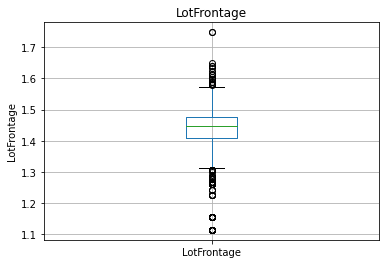

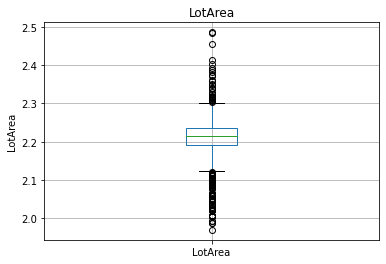

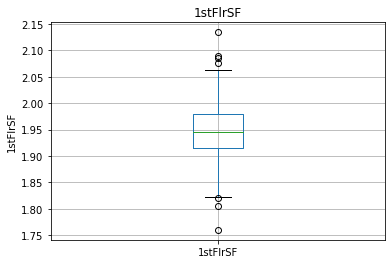

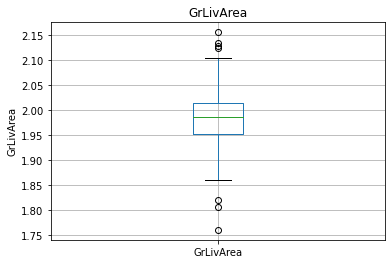

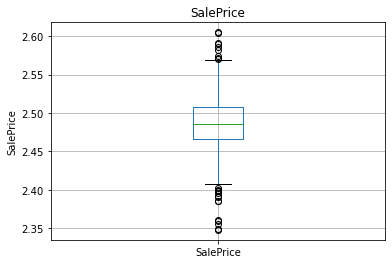

In [33]:
for feature in continuous_feature:
    data=Train_1.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

There are lot of outlier in the data set and needs to be treated.

## Replacing NaN

In [34]:
Train_1['MasVnrType'].fillna((Train_1['MasVnrType'].mode()[0]), inplace=True)

In [35]:
Train_1['BsmtQual'].fillna((Train_1['BsmtQual'].mode()[0]), inplace=True)

In [36]:
Train_1['BsmtCond'].fillna((Train_1['BsmtCond'].mode()[0]), inplace=True)

In [37]:
Train_1['BsmtExposure'].fillna((Train_1['BsmtExposure'].mode()[0]), inplace=True)

In [38]:
Train_1['BsmtFinType1'].fillna((Train_1['BsmtFinType1'].mode()[0]), inplace=True)

In [39]:
Train_1['BsmtFinType2'].fillna((Train_1['BsmtFinType2'].mode()[0]), inplace=True)

In [40]:
Train_1['GarageType'].fillna((Train_1['GarageType'].mode()[0]), inplace=True)

In [41]:
Train_1['GarageFinish'].fillna((Train_1['GarageFinish'].mode()[0]), inplace=True)

In [42]:
Train_1['GarageQual'].fillna((Train_1['GarageQual'].mode()[0]), inplace=True)

In [43]:
Train_1['GarageCond'].fillna((Train_1['GarageCond'].mode()[0]), inplace=True)

In [44]:
Train_object = Train_1.select_dtypes (include='object')

In [45]:
Train_object.sample(5)

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
267,RL,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1109,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
558,RM,Pave,Reg,Lvl,Inside,Gtl,BrDale,Norm,Norm,Twnhs,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Family
587,RL,Pave,Reg,Lvl,Corner,Gtl,CollgCr,Norm,Norm,1Fam,...,SBrkr,Gd,Typ,Detchd,RFn,TA,TA,Y,WD,Normal
394,RL,Pave,IR1,Lvl,Corner,Gtl,NridgHt,Norm,Norm,1Fam,...,SBrkr,Ex,Typ,BuiltIn,RFn,TA,TA,Y,ConLI,Normal


## Visualization

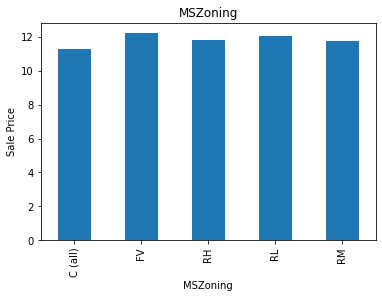

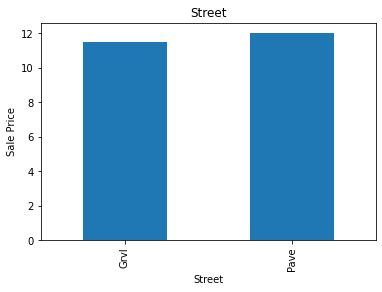

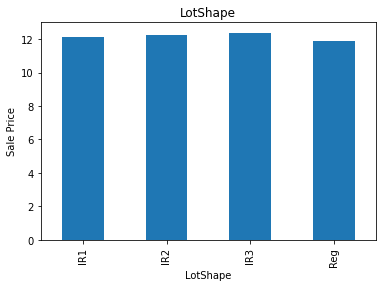

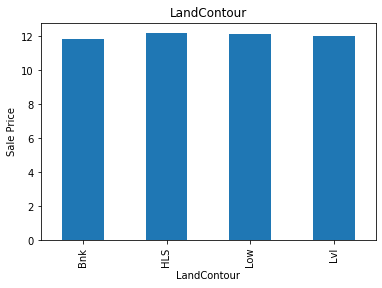

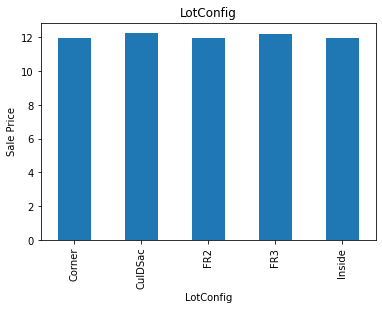

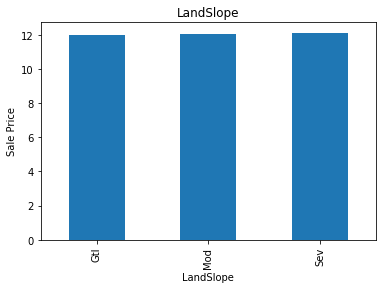

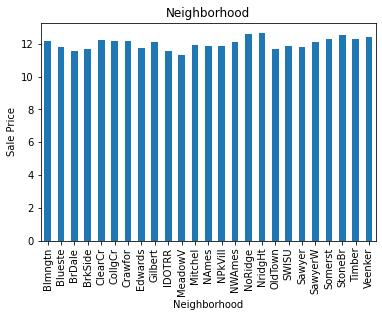

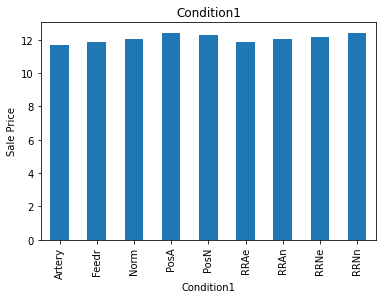

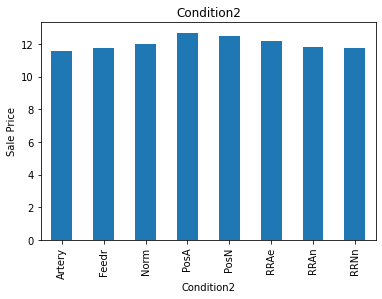

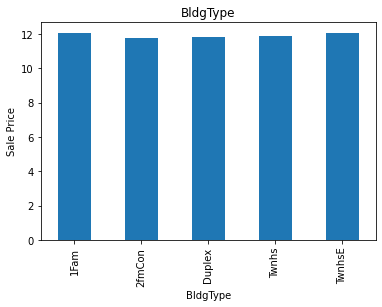

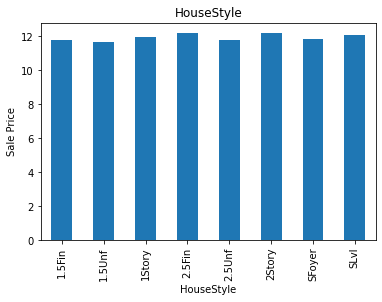

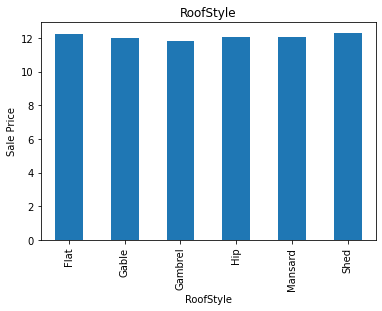

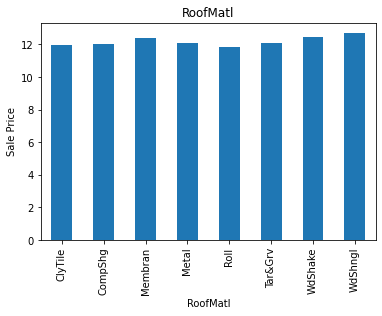

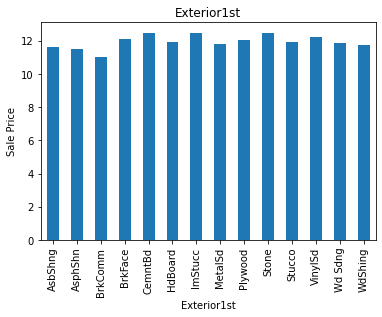

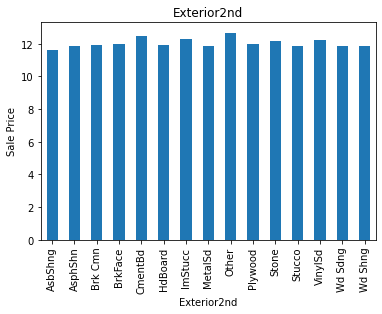

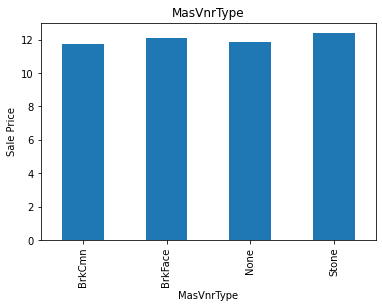

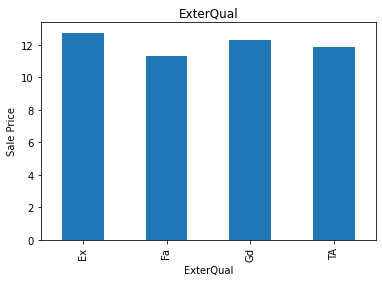

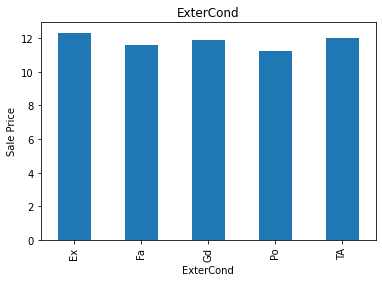

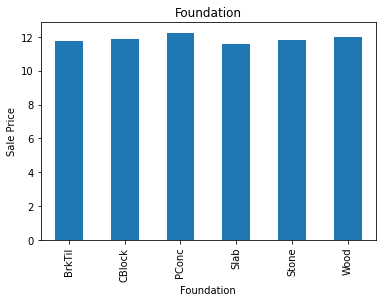

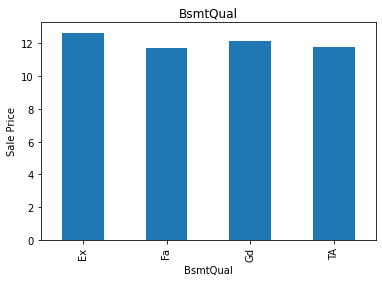

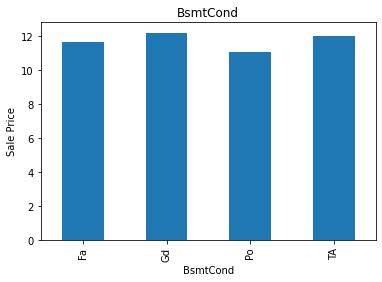

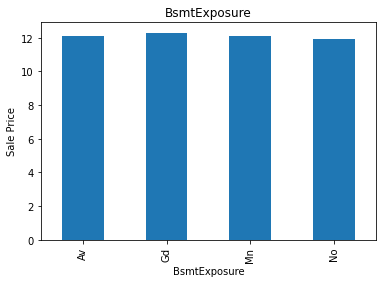

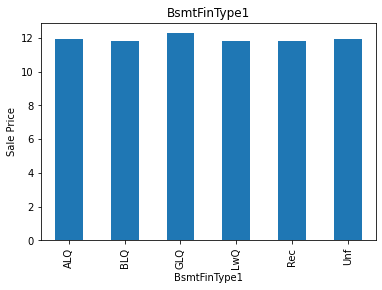

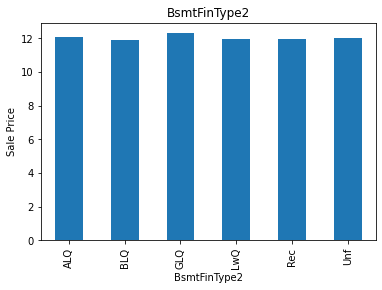

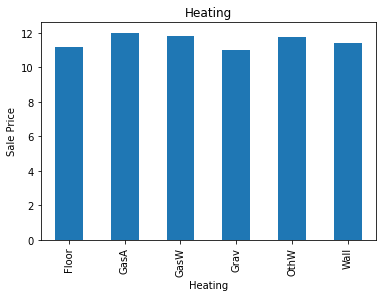

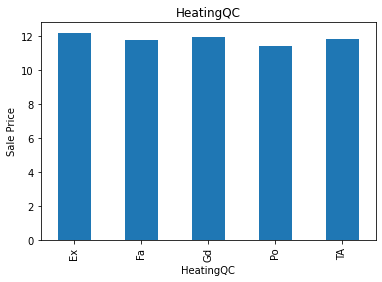

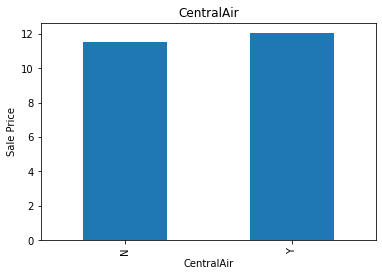

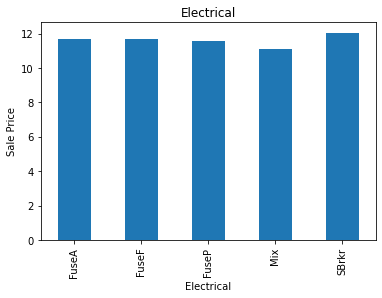

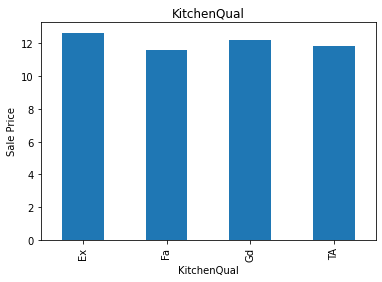

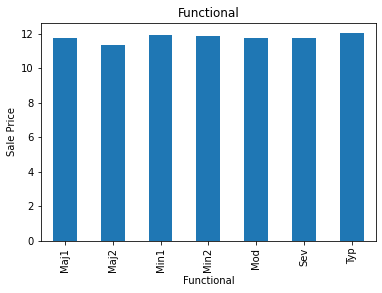

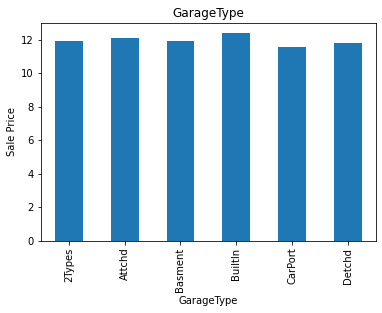

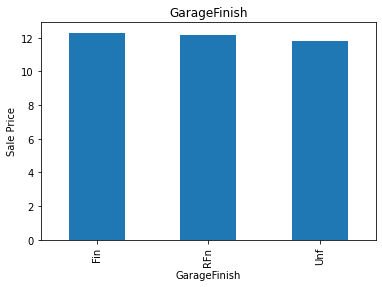

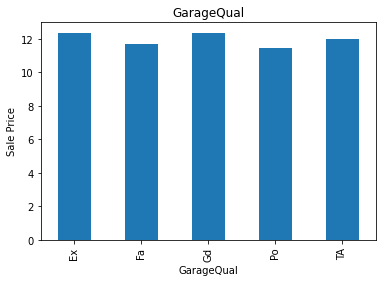

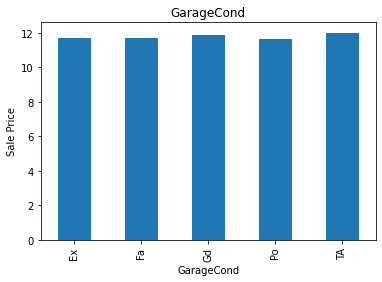

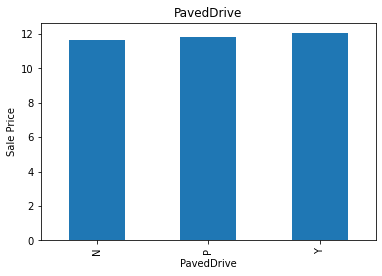

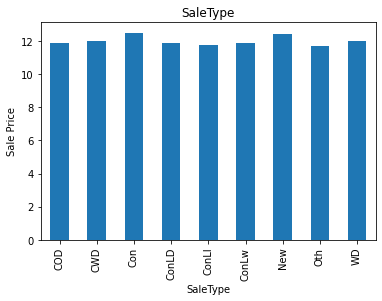

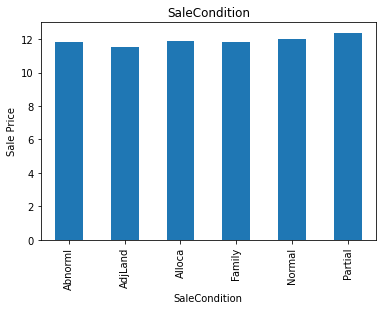

In [46]:
for feature in Train_object:
    data=Train_1.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

In [47]:
Train_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

# Encode Categorical Columns
le = LabelEncoder()
Train_1[categ] = Train_1[categ].apply(le.fit_transform)

In [49]:
Train_1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,4.248495,8.502689,1,0,3,4,0,13,...,0,0,0,0,0,2,2007,8,4,11.759786
1,20,3,4.553877,9.671871,1,0,3,4,1,12,...,0,0,224,0,0,10,2007,8,4,12.498742
2,60,3,4.521789,9.202308,1,0,3,1,0,15,...,0,0,0,0,0,6,2007,8,4,12.505399
3,20,3,4.653960,9.371694,1,0,3,4,0,14,...,0,0,0,0,0,1,2010,0,4,12.154779
4,20,3,4.248495,9.719264,1,0,3,2,0,14,...,0,0,0,0,0,6,2009,8,4,12.278393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,4.248495,9.192075,1,0,3,4,0,19,...,0,0,0,0,0,2,2010,8,4,11.711776
1164,20,3,4.204693,9.079890,1,3,3,4,0,7,...,0,0,0,0,0,5,2009,8,4,11.589887
1165,160,3,3.178054,7.731931,1,3,3,2,0,13,...,0,0,0,0,0,7,2009,8,4,11.908340
1166,70,0,3.912023,9.047821,1,3,3,4,0,9,...,172,0,0,0,0,7,2008,8,4,10.596635


In [50]:
df_train= Train_1.drop(['YrSold' ], axis=1)

In [51]:
df_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,3.013699,4.213258,9.117634,0.996575,1.938356,2.773973,3.004281,0.064212,12.145548,...,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,7.465753,3.768836,12.028292
std,41.940650,0.633120,0.314679,0.505260,0.058445,1.412262,0.710027,1.642667,0.284088,6.010364,...,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.619459,1.112208,0.397423
min,20.000000,0.000000,3.044522,7.170120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.460242
25%,20.000000,3.000000,4.094345,8.938727,1.000000,0.000000,3.000000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,8.000000,4.000000,11.778169
50%,50.000000,3.000000,4.248495,9.161413,1.000000,3.000000,3.000000,4.000000,0.000000,12.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,4.000000,12.007591
75%,70.000000,3.000000,4.372593,9.351449,1.000000,3.000000,3.000000,4.000000,0.000000,17.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,4.000000,12.278393
max,190.000000,4.000000,5.746203,12.011638,1.000000,3.000000,3.000000,4.000000,2.000000,24.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,8.000000,5.000000,13.534473


In [52]:
y=df_train[['SalePrice']]

In [53]:
X_train=df_train.drop(['SalePrice'],axis=1)

In [54]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Apply Feature Selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [55]:
feature_sel_model.get_support()

array([ True, False, False,  True, False,  True, False, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True])

In [56]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 72
selected features: 43


In [57]:
selected_feat

Index(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SaleCondition'],
      dtype='object')

In [58]:
X_train=X_train[selected_feat]

In [59]:
X_train.head()

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,120,8.502689,0,13,2,6,5,31,31,1,...,440,2,0,205,0,0,0,0,2,4
1,20,9.671871,0,12,2,8,6,37,37,5,...,621,2,81,207,0,0,224,0,10,4
2,60,9.202308,0,15,5,7,5,11,10,1,...,455,2,180,130,0,0,0,0,6,4
3,20,9.371694,0,14,2,6,6,33,33,1,...,546,2,0,122,0,0,0,0,1,4
4,20,9.719264,0,14,2,6,7,32,9,1,...,529,2,240,0,0,0,0,0,6,4


In [60]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled= scaler.fit_transform(X_train)
x_scaled

array([[ 1.50830058, -1.21760831, -1.37310708, ..., -0.07684505,
        -1.61782184,  0.20793187],
       [-0.87704243,  1.09740244, -1.37310708, ..., -0.07684505,
         1.3614701 ,  0.20793187],
       [ 0.07709478,  0.16765664, -1.37310708, ..., -0.07684505,
        -0.12817587,  0.20793187],
       ...,
       [ 2.46243779, -2.74372849,  0.75205511, ..., -0.07684505,
         0.24423562,  0.20793187],
       [ 0.31562908, -0.13823111,  0.75205511, ..., -0.07684505,
         0.24423562,  0.20793187],
       [ 0.07709478, -0.29297474, -1.37310708, ..., -0.07684505,
        -0.12817587,  0.20793187]])

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,test_size=0.25, random_state=323)

In [63]:
import warnings
warnings.simplefilter("ignore")

In [64]:
from sklearn.model_selection import cross_val_score
ml_models=[LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in ml_models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    mse=mean_squared_error(y_test,predm)
    mae=mean_absolute_error(y_test,predm)
    r2=r2_score(y_test,predm)
    print(f'metrics of {m}:')
    print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')
    score=cross_val_score(m,x_scaled,y, cv=5)
    print(' mean cv score:',score.mean())
    print('\n\n')

metrics of LinearRegression():
 mean_absolute_error: 0.10219821153348653
 mean_squared_error: 0.02092735993565864
 r2_score: 0.8646198624524845 
 mean cv score: 0.8533261845767184



metrics of SVR():
 mean_absolute_error: 0.1087455139273754
 mean_squared_error: 0.030182121731819538
 r2_score: 0.8047503457630483 
 mean cv score: 0.8175661098506278



metrics of RandomForestRegressor():
 mean_absolute_error: 0.10866650207886049
 mean_squared_error: 0.02525751791619281
 r2_score: 0.83660785401905 
 mean cv score: 0.8490043018778334



metrics of GradientBoostingRegressor():
 mean_absolute_error: 0.10026257349248227
 mean_squared_error: 0.022700480162751342
 r2_score: 0.8531494590681057 
 mean cv score: 0.8680265174088166





In [65]:
## CV score is more, so selecting GradientBoostingRegressor()
#Makikng the model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 0.10112941929389285
 mean_squared_error: 0.022998724469639242
 r2_score: 0.8512201017381136 


In [66]:
print('Train score:',gbr.score(x_train,y_train))
print('Test score:',gbr.score(x_test,y_test))

Train score: 0.961405520924165
Test score: 0.8512201017381136


In [67]:
#Tuning
from sklearn.model_selection import GridSearchCV
par={'loss':['squared_error', 'absolute_error'],
     'min_samples_split':range(2,10),
     'min_samples_leaf':range(1,10)
    }
grid=GridSearchCV(gbr,param_grid=par, cv=5,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=1

[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=4; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=4; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=4; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=5; total time=   0.4s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=5; total time=   0.4s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=5; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=5; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=5; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=3, min_samples_split=6; total time=   0.3s
[CV] END loss=squared

[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=7; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=7; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=8; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=5, min_samples_split=9; total time=   0.2s
[CV] END loss=squared

[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=9; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=7, min_samples_split=9; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=2; total time=   0.3s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END loss=squared_error, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END loss=squared

[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=4; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=1, min_samples_split=6; total time=   0.5s
[CV] END l

[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=6; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=7; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=7; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=7; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=7; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=7; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8; total time=   0.7s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=3, min_samples_split=8; total time=   0.6s
[CV] END l

[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=8; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=9; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=9; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=9; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=9; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=5, min_samples_split=9; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2; total time=   0.4s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=6, min_samples_split=2; total time=   0.5s
[CV] END l

[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=3; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=3; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=3; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=3; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=4; total time=   0.7s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=4; total time=   0.8s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=4; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=4; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=4; total time=   0.6s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END loss=absolute_error, min_samples_leaf=8, min_samples_split=5; total time=   0.5s
[CV] END l

In [68]:
gbr_tuned=GradientBoostingRegressor(min_samples_split=8,min_samples_leaf=1,loss='squared_error')
gbr_tuned.fit(x_train,y_train)
pred=gbr_tuned.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 0.09969043538619318
 mean_squared_error: 0.022258478159734838
 r2_score: 0.8560087921205608 


In [115]:
#Saving the model as obj file
import pickle
file=open('housing_project.pkl','wb')
pickle.dump(gbr_tuned,file)

## Importing Test dataset

Applying similar operation on test data set, so that we can test the model on it.

In [88]:
Test_data=pd.read_csv("E:\\DATA SCIENCE COURSE\\INTERSHIP- FLIPROBO\\Housing Project\\test.csv")
Test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [89]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

There is lot of missing data in columns "Alley","PoolQC","Fence","MiscFeature", Also ID is unique value to identify the property, so not much influence would be made on the prediction.

Maintaining uniformity with train data, dropping all the columns.

In [90]:
Test_d= Test_data.drop(["Alley","PoolQC","Fence","MiscFeature","Id"], axis=1)

In [91]:
Test_d.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,...,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,NaN,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,NaN,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,18,0,0,0,0,0,1,2008,WD,Normal


In [92]:
Test_1= Test_d.drop(['Utilities','FireplaceQu' ], axis=1)

In [93]:
Test_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,IR1,HLS,Corner,Gtl,StoneBr,...,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,NaN,5814,Pave,IR1,Lvl,CulDSac,Gtl,StoneBr,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,NaN,11838,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,Reg,Bnk,Inside,Gtl,Crawfor,...,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,...,18,0,0,0,0,0,1,2008,WD,Normal


In [94]:
Test_1['LotFrontage'].fillna(int(Test_1['LotFrontage'].mean()), inplace=True)

In [95]:
Test_1['MasVnrArea'].fillna(int(Test_1['MasVnrArea'].mean()), inplace=True)

In [96]:
Test_1['GarageYrBlt'].fillna(int(Test_1['GarageYrBlt'].mean()), inplace=True)

In [97]:
Test_1['MasVnrType'].fillna((Test_1['MasVnrType'].mode()[0]), inplace=True)

In [98]:
Test_1['BsmtQual'].fillna((Test_1['BsmtQual'].mode()[0]), inplace=True)

In [99]:
Test_1['BsmtCond'].fillna((Test_1['BsmtCond'].mode()[0]), inplace=True)

In [100]:
Test_1['BsmtExposure'].fillna((Test_1['BsmtExposure'].mode()[0]), inplace=True)

In [101]:
Test_1['BsmtFinType1'].fillna((Test_1['BsmtFinType1'].mode()[0]), inplace=True)

In [102]:
Test_1['BsmtFinType2'].fillna((Test_1['BsmtFinType2'].mode()[0]), inplace=True)

In [103]:
Test_1['GarageType'].fillna((Test_1['GarageType'].mode()[0]), inplace=True)

In [104]:
Test_1['GarageFinish'].fillna((Test_1['GarageFinish'].mode()[0]), inplace=True)

In [105]:
Test_1['GarageQual'].fillna((Test_1['GarageQual'].mode()[0]), inplace=True)

In [106]:
Test_1['GarageCond'].fillna((Test_1['GarageCond'].mode()[0]), inplace=True)

In [107]:
Test_1['Electrical'].fillna((Test_1['Electrical'].mode()[0]), inplace=True)

In [108]:
Test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   LotConfig      292 non-null    object 
 8   LandSlope      292 non-null    object 
 9   Neighborhood   292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Condition2     292 non-null    object 
 12  BldgType       292 non-null    object 
 13  HouseStyle     292 non-null    object 
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

In [109]:
for feature in['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    Test_1[feature]=Test_1['YrSold']-Test_1[feature]

In [110]:
Test_1[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2,1,2.0
1,25,25,25.0
2,8,8,8.0
3,68,59,68.0
4,1,1,1.0


In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

# Encode Categorical Columns
le = LabelEncoder()
Test_1[categ] = Test_1[categ].apply(le.fit_transform)

In [112]:
Test_1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.0,14157,1,0,1,0,0,21,...,51,0,0,0,0,0,7,2007,5,2
1,120,2,66.0,5814,1,0,3,1,0,21,...,0,0,0,0,0,0,8,2009,0,0
2,20,2,66.0,11838,1,3,3,4,0,4,...,151,0,0,0,0,0,6,2009,5,2
3,70,2,75.0,12000,1,3,0,4,0,5,...,0,0,0,0,0,0,7,2009,5,2
4,60,2,86.0,14598,1,0,3,1,0,20,...,18,0,0,0,0,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,78.0,10206,1,3,3,4,0,20,...,99,0,0,0,0,0,10,2008,5,2
288,20,2,57.0,9245,1,1,3,4,0,4,...,0,0,0,0,0,0,2,2008,5,2
289,20,2,66.0,11241,1,0,3,1,0,11,...,0,0,0,0,0,700,3,2010,5,2
290,50,3,50.0,5000,1,3,3,0,0,2,...,24,36,0,0,0,0,10,2006,5,2


In [113]:
df_test= Test_1.drop(['YrSold' ], axis=1)

In [126]:
df=df_test[['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SaleCondition']]

In [132]:
loaded_model=pickle.load(open('housing_project.pkl','rb'))
result= loaded_model.score(df, y_test )
print(result)

-1.655019598429182


In [135]:
pred=gbr_tuned.predict(df)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 0.5473744063561125
 mean_squared_error: 0.41041877914368424
 r2_score: -1.655019598429182 
